# Algoritimo de Wagner Fischer

### Na ciência da computação, o algoritmo Wagner-Fischer é um algoritmo de programação dinâmica que calcula a distância de edição entre duas cadeias de caracteres.

## String Match : Correspondência de String

In [ ]:
Frutas = [ " abacate", "abacaxi", "açai"]

In [ ]:
fruta = input()

In [ ]:
for frutas in Frutas:
    print(fruta == frutas)

## Correspondência de String Aproximada: Distância Levenshtein

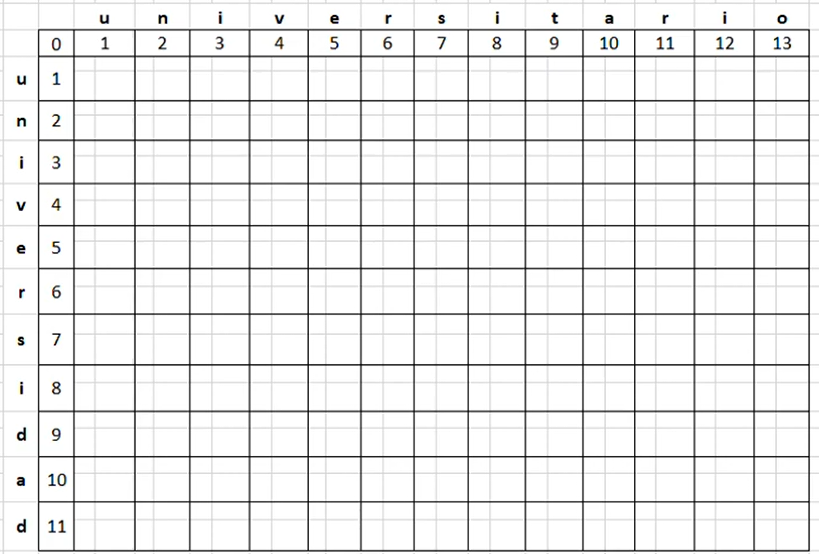

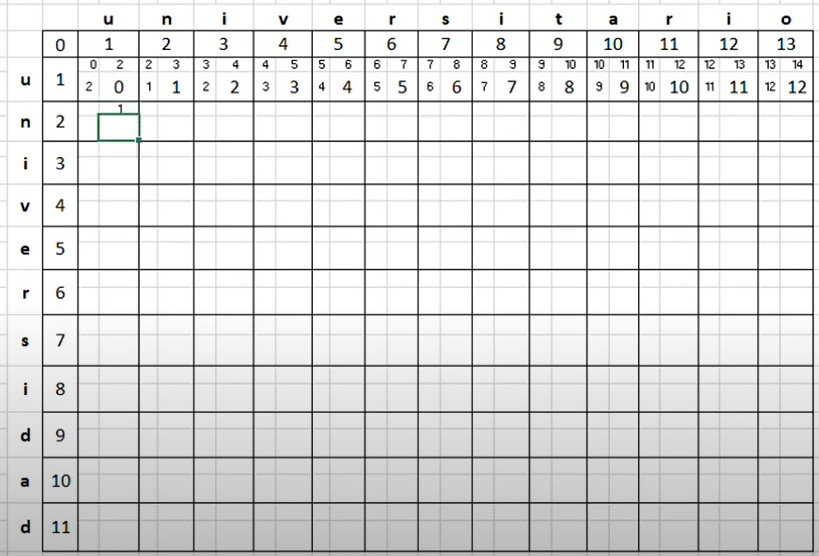

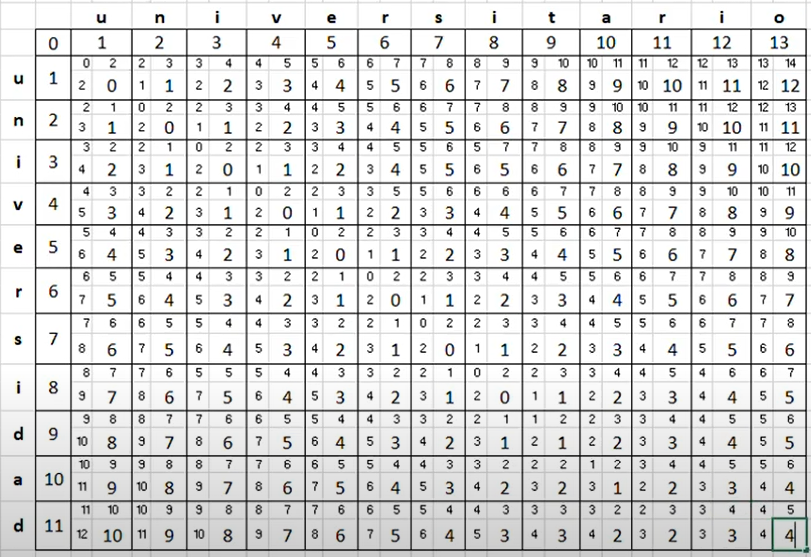

Existem diferentes métricas para medir a distância de uma String, uma comumente usada é a distância Levenshtein para a qual explicarei as regras.


### A distância de Levenshtein usa as operações abaixo com suas penalidades correspondentes para a distância da corda.

1 - Adição: “casle” => “castle” . 't' é adicionado. Penalidade: 1

2 - Exclusão: “escola” => “escla” . 'o' é removido. Penalidade: 1

3 - Substituição: “block” => “blokk”. 'k' é substituído por 'c'. Penalidade: 2

A razão pela qual a substituição tem mais penalidade é que ela é, em sua essência, uma exclusão e adição em ordem.


# Implementação

In [1]:
def levenshtein_distance(a,b):
    return l_d(a,b)

def l_d(a,b):
    if min(len(a),len(b)) == 0:
        return max(len(a),len(b))
    k = 0 if a[-1] == b[-1] else 2
    return min( l_d(a[:-1],b) + 1 , 
                l_d(a,b[:-1]) + 1 , 
                l_d(a[:-1],b[:-1]) + k 
                )
print(levenshtein_distance("Amos","Amoz")) #2
print(levenshtein_distance("claudio","claudene")) #5
print(levenshtein_distance("Pedro","Pietro")) #3


2
5
3


## Programação Dinâmica

Programação dinâmica é uma técnica utilizada em ciência da computação para resolver problemas computacionalmente complexos, dividindo-os em subproblemas menores e resolvendo-os de forma iterativa

In [1]:
def fib_recursiva(n):
  if n <= 1:
    return n;
  else:
    return fib_recursiva(n-1) + fib_recursiva(n-2) 

def fib_memoizada(n):
    arr = [-1 for i in range(n+1)]
    arr[0] = 0
    arr[1] = 1
    return fibUtil(n,arr)
    
def fibUtil(n,arr):
    if arr[n] != -1:
        return arr[n]
    else:
        arr[n] = fibUtil(n-1,arr) + fibUtil(n-2,arr)
        return arr[n]

import profile


In [2]:
import profile

print("recursiva")
profile.run('print(fib_recursiva(20))')
print("memoizada")
profile.run('print(fib_memoizada(600))')

recursiva
6765
         21912 function calls (22 primitive calls) in 0.047 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  21891/1    0.047    0.000    0.047    0.047 1356421883.py:1(fib_recursiva)
        2    0.000    0.000    0.000    0.000 :0(__exit__)
        1    0.000    0.000    0.047    0.047 :0(exec)
        2    0.000    0.000    0.000    0.000 :0(getpid)
        2    0.000    0.000    0.000    0.000 :0(isinstance)
        2    0.000    0.000    0.000    0.000 :0(len)
        1    0.000    0.000    0.000    0.000 :0(print)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
        2    0.000    0.000    0.000    0.000 :0(write)
        1    0.000    0.000    0.047    0.047 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 iostream.py:437(_is_master_process)
        2    0.000    0.000    0.000    0.000 iostream.py:456(_schedule_flush)
        2    0.000    0.000    0.000    0.000 iost

Quando uma função é memoizada, seu resultado é armazenado em uma estrutura de dados, como uma tabela de hash, emparelhando os argumentos de entrada com o resultado correspondente. Ao chamar novamente a função com os mesmos argumentos, em vez de executar todo o processamento novamente, o resultado é obtido diretamente do cache.

In [3]:
from functools import lru_cache

@lru_cache(maxsize=None)
def fib(n):
    if n <=1:
        return n
    else:
        return fib(n-1) + fib(n-2)

import profile

profile.run('print(fib(300))')

222232244629420445529739893461909967206666939096499764990979600
         330 function calls (30 primitive calls) in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    301/1    0.000    0.000    0.000    0.000 1826633889.py:3(fib)
        2    0.000    0.000    0.000    0.000 :0(__exit__)
        1    0.000    0.000    0.000    0.000 :0(acquire)
        1    0.000    0.000    0.000    0.000 :0(append)
        1    0.000    0.000    0.000    0.000 :0(exec)
        2    0.000    0.000    0.000    0.000 :0(getpid)
        2    0.000    0.000    0.000    0.000 :0(isinstance)
        2    0.000    0.000    0.000    0.000 :0(len)
        1    0.000    0.000    0.000    0.000 :0(print)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
        2    0.000    0.000    0.000    0.000 :0(write)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 iostream.py:2

# Algoritimo de Wagner Fischer

In [5]:
def levenshtein_distance(a,b):
    len_a = len(a)
    len_b = len(b)
    d2_memo = [[0 for i in range(len_b+1)] for k in range(len_a+1)]
    return l_d(a,b,d2_memo,len_a,len_b)
    

def l_d(a,b,d2_memo,len_a,len_b):
    
    for i in range(1,len_a+1):
        for m in range(1,len_b+1):
            k = 0 if a[i-1] == b[m-1] else 2
            d2_memo[i][m] = min(d2_memo[i-1][m] + 1 ,
                                d2_memo[i][m-1] + 1 ,
                                d2_memo[i-1][m-1] + k
                                )
    return d2_memo[len_a][len_b]

print(levenshtein_distance("al","alis"))
print(levenshtein_distance("ezgi","ezgy"))
print(levenshtein_distance("seyhmus","sehmuz"))

2
2
3


In [ ]:
import profile
text = "Lorem ipsum dolor sit amet consectetur adipiscing elit Etiam rutrum tristique tellus in efficitur"
text = text.lower()

import random
k = [a1 if random.random() < 0.9 else 'k' for a1 in text ]
test_text = "".join(k)

ex = 'print(levenshtein_distance(text,test_text))'
profile.run(ex)

In [7]:
import profile


def levenshtein_distance(a,b):
    return l_d(a,b)

def l_d(a,b):
    if min(len(a),len(b)) == 0:
        return max(len(a),len(b))
    k = 0 if a[-1] == b[-1] else 2
    return min( l_d(a[:-1],b) + 1 , 
                l_d(a,b[:-1]) + 1 , 
                l_d(a[:-1],b[:-1]) + k 
                )

profile.run('print(levenshtein_distance("Amos","Amoz"))')


2
         3077 function calls (2597 primitive calls) in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 1246281359.py:4(levenshtein_distance)
    481/1    0.000    0.000    0.000    0.000 1246281359.py:7(l_d)
        2    0.000    0.000    0.000    0.000 :0(__exit__)
        1    0.000    0.000    0.000    0.000 :0(acquire)
        1    0.000    0.000    0.000    0.000 :0(append)
        1    0.000    0.000    0.000    0.000 :0(exec)
        2    0.000    0.000    0.000    0.000 :0(getpid)
        2    0.000    0.000    0.000    0.000 :0(isinstance)
     1606    0.000    0.000    0.000    0.000 :0(len)
      321    0.000    0.000    0.000    0.000 :0(max)
      641    0.000    0.000    0.000    0.000 :0(min)
        1    0.000    0.000    0.000    0.000 :0(print)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
        2    0.000    0.000    0.000    0.000 :0(